<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Preprocessing" data-toc-modified-id="Preprocessing-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Preprocessing</a></span></li><li><span><a href="#Predictive-models" data-toc-modified-id="Predictive-models-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Predictive models</a></span><ul class="toc-item"><li><span><a href="#Random-Forests" data-toc-modified-id="Random-Forests-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Random Forests</a></span></li><li><span><a href="#XGBoost" data-toc-modified-id="XGBoost-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>XGBoost</a></span><ul class="toc-item"><li><span><a href="#XGBoost" data-toc-modified-id="XGBoost-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>XGBoost</a></span></li></ul></li><li><span><a href="#old" data-toc-modified-id="old-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>old</a></span></li><li><span><a href="#Logistic-regression" data-toc-modified-id="Logistic-regression-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Logistic regression</a></span><ul class="toc-item"><li><span><a href="#With-smaller-subset-of-data" data-toc-modified-id="With-smaller-subset-of-data-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>With smaller subset of data</a></span><ul class="toc-item"><li><span><a href="#Grid-search" data-toc-modified-id="Grid-search-2.4.1.1"><span class="toc-item-num">2.4.1.1&nbsp;&nbsp;</span>Grid search</a></span></li><li><span><a href="#Hyperopt" data-toc-modified-id="Hyperopt-2.4.1.2"><span class="toc-item-num">2.4.1.2&nbsp;&nbsp;</span>Hyperopt</a></span></li></ul></li><li><span><a href="#With-all-data" data-toc-modified-id="With-all-data-2.4.2"><span class="toc-item-num">2.4.2&nbsp;&nbsp;</span>With all data</a></span><ul class="toc-item"><li><span><a href="#Grid-search" data-toc-modified-id="Grid-search-2.4.2.1"><span class="toc-item-num">2.4.2.1&nbsp;&nbsp;</span>Grid search</a></span></li><li><span><a href="#Hyperopt" data-toc-modified-id="Hyperopt-2.4.2.2"><span class="toc-item-num">2.4.2.2&nbsp;&nbsp;</span>Hyperopt</a></span></li></ul></li></ul></li><li><span><a href="#Support-Vector-Machine" data-toc-modified-id="Support-Vector-Machine-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Support Vector Machine</a></span><ul class="toc-item"><li><span><a href="#Linear-SVM" data-toc-modified-id="Linear-SVM-2.5.1"><span class="toc-item-num">2.5.1&nbsp;&nbsp;</span>Linear SVM</a></span><ul class="toc-item"><li><span><a href="#With-smaller-subset-of-data" data-toc-modified-id="With-smaller-subset-of-data-2.5.1.1"><span class="toc-item-num">2.5.1.1&nbsp;&nbsp;</span>With smaller subset of data</a></span></li><li><span><a href="#Grid-search" data-toc-modified-id="Grid-search-2.5.1.2"><span class="toc-item-num">2.5.1.2&nbsp;&nbsp;</span>Grid search</a></span></li><li><span><a href="#Hyperopt" data-toc-modified-id="Hyperopt-2.5.1.3"><span class="toc-item-num">2.5.1.3&nbsp;&nbsp;</span>Hyperopt</a></span></li><li><span><a href="#With-whole-data-set" data-toc-modified-id="With-whole-data-set-2.5.1.4"><span class="toc-item-num">2.5.1.4&nbsp;&nbsp;</span>With whole data set</a></span></li></ul></li><li><span><a href="#SVM-with-RBF-Kernel" data-toc-modified-id="SVM-with-RBF-Kernel-2.5.2"><span class="toc-item-num">2.5.2&nbsp;&nbsp;</span>SVM with RBF-Kernel</a></span><ul class="toc-item"><li><span><a href="#With-smaller-subset-of-data" data-toc-modified-id="With-smaller-subset-of-data-2.5.2.1"><span class="toc-item-num">2.5.2.1&nbsp;&nbsp;</span>With smaller subset of data</a></span></li><li><span><a href="#With-more-data" data-toc-modified-id="With-more-data-2.5.2.2"><span class="toc-item-num">2.5.2.2&nbsp;&nbsp;</span>With more data</a></span></li></ul></li><li><span><a href="#SVM-with-polynomial-kernel" data-toc-modified-id="SVM-with-polynomial-kernel-2.5.3"><span class="toc-item-num">2.5.3&nbsp;&nbsp;</span>SVM with polynomial kernel</a></span><ul class="toc-item"><li><span><a href="#With-smaller-subset-of-data" data-toc-modified-id="With-smaller-subset-of-data-2.5.3.1"><span class="toc-item-num">2.5.3.1&nbsp;&nbsp;</span>With smaller subset of data</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Performance-comparison" data-toc-modified-id="Performance-comparison-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Performance comparison</a></span></li></ul></div>

In [1]:
import pdb 
import glob
import copy
import math
import pickle

import numpy as np
import pandas as pd
import scipy as sp

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
 
import missingno  # for visualizing missing data

from hyperopt import hp
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, \
    StratifiedShuffleSplit, GridSearchCV, RandomizedSearchCV

from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression, \
    LogisticRegressionCV, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, classification_report, \
    precision_recall_curve, average_precision_score, f1_score, \
    roc_curve, auc, roc_auc_score, make_scorer,\
    accuracy_score, balanced_accuracy_score

from sklearn.externals import joblib
from sklearn.utils import resample
from sklearn.utils.fixes import signature


# Set up pandas table display
pd.set_option('display.width', 120)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)

# Set plotting options
sns.set() # Use seaborn defaults for plotting
%matplotlib inline 


# Adjust number of CPU cores to use
n_jobs=2

## Preprocessing

In [ ]:
# Load preprocessed training and test set, incl. feature names 
X_train = joblib.load('data_processed/X_train.joblib')
X_test = joblib.load('data_processed/X_test.joblib')
y_train = joblib.load('data_processed/y_train.joblib')
y_test = joblib.load('data_processed/y_test.joblib')
X_train_small = joblib.load('data_processed/X_train_small.joblib')
X_test_small = joblib.load('data_processed/X_test_small.joblib')
y_train_small = joblib.load('data_processed/y_train_small.joblib')
y_test_small = joblib.load('data_processed/y_test_small.joblib')
feature_names = joblib.load('data_processed/feature_names')
feature_names_small = joblib.load('data_processed/feature_names_small')

In [2]:
# Load original data
with open('data_processed/all_data.pickle', 'rb') as pickled_file: 
    all_data = pickle.load(pickled_file)  

    
# Find categorical variables with more than 50 unique values and drop them
unique_values_cat = all_data.select_dtypes(include='object') \
                        .nunique() \
                        .sort_values(ascending=False) 
# Drop categorical variables with more than 50 categories
all_data = all_data.drop(unique_values_cat[unique_values_cat > 50].index,
                 axis='columns')


def split_preprocess(X=all_data.drop('default', axis='columns'),
                     y=all_data.default,
                     train_size=.8, test_size=.2):
    """
    Splits the data into training and test set of specified size, 
    then applies preprocessing.
    """
    
    # Train-test split 
    # ================
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y,
                         train_size=train_size, test_size=test_size,
                         random_state=1, shuffle=True, stratify=y) 

    # Preprocessing
    # =============
    # Imputation and standardization for numeric features
    numeric_features = X_train.select_dtypes(include=[np.number]).columns
    numeric_transformer = Pipeline(steps =[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())]) 

    # Imputation and one-hot encoding for categorical features
    categorical_features = X_train.select_dtypes(include=[object]).columns
    categorical_transformer = Pipeline(steps =[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))])

    # Combining preprocessing for both kinds of features
    # (Features of other dtypes – in our case, boolean – will be
    # appended at the end without transformation.)
    # (Use only 1 core to avoid joblib error)
    preprocessor = ColumnTransformer(
        transformers=[
            ('numeric_transformer', 
                 numeric_transformer, numeric_features),
            ('categorical_transformer', 
                 categorical_transformer, categorical_features)],
        remainder='passthrough', n_jobs=1) 
    
    # Print dtypes of untransformed data
    print('data types of columns that were not transformed:\n {}'
            .format(X_train.select_dtypes(exclude=[np.number, object]) \
                    .dtypes.unique()))

    # Apply preprocessing
    X_train_p = preprocessor.fit_transform(X_train)
    X_test_p = preprocessor.transform(X_test)
   

    # Get feature names
    # =================
    # Names of categorical variables after one-hot encoding
    categorical_names = preprocessor \
        .named_transformers_['categorical_transformer'] \
        .named_steps['onehot'] \
        .get_feature_names()
    # Names of columns with other dtype (should only be Boolean)
    other_names = X_train \
        .select_dtypes(exclude=[np.number, object]) \
        .columns
    # Concatenate feature names (Note that list with names of 
    # numeric features was already created above)
    feature_names = list(numeric_features) + \
        list(categorical_names) + list(other_names) 

    
    # Return results
    # ==============
    return(X_train_p, X_test_p, y_train, y_test, feature_names)
  
    
# Create smaller training and test data to start out with
X_train_small, X_test_small, y_train_small, y_test_small, feature_names_small= \
    split_preprocess(train_size=20000, test_size=10000)

# Create full training and test set
X_train, X_test, y_train, y_test, feature_names = \
    split_preprocess(train_size=.8, test_size=.2)


# Save preprocessed training and test sets
filenames_whole = ['X_train', 'X_test', 'y_train', 'y_test']
filenames_small = [filename + '_small' for filename in filenames_whole]
filenames = filenames_whole + filenames_small
files = [X_train, X_test, y_train, y_test,
         X_train_small, X_test_small, y_train_small, y_test_small]

for file, filename in zip(files, filenames):
    joblib.dump(file,
                'data_processed/{}.joblib'.format(filename))
# Delete temporary list to conserve memory
del files

# Save feature names
joblib.dump(feature_names, 'data_processed/feature_names')
joblib.dump(feature_names_small, 'data_processed/feature_names_small')

data types of columns that were not transformed:
 [dtype('bool')]
data types of columns that were not transformed:
 [dtype('bool')]


['data_processed/feature_names_small']

## Predictive models

In [3]:
# Dictionaries to store results for SMALL data set
# average_precision_1 = {}
classification_reports_1 = {}
most_important_features_1 = {} 
# Note that models with small data were estimated on a different subset
# of the observations, though the size stayed constant.  So don't use future 
# importance on these data, unless re-estimating models!

# Dictionaries to store results for WHOLE data set
# average_precision_2 = {}
classification_reports_2 = {}
most_important_features_2 = {}

In [4]:
# Calculate average precision
def print_save_ap(clf, model_name, X_test, y_test, validation_plot=False):
    """
    Calculates, saves, and prints average precision score on test set; 
    optionally plot how average precision changed over iterations.
    """

    # Score classifier with the test data
    # Try if classifier supports probability
    try:
        y_score = clf.predict_proba(X_test)[:,1]
    # If it doesn't, use its decision function
    except AttributeError:
        y_score = clf.decision_function(X_test)
   
    # Calculate average precision
    ap_score = average_precision_score(y_test, y_score)
    
    # Save AP
    try:
        average_precision_hp[model_name] = ap_score
    # If dictionary to save AP doesn't exist yet, create it first
    except NameError:
        average_precision = {}
        average_precision[model_name] = ap_score
    
    # Print AP
    print('Best average precision score on *test* set: {}'.format(ap_score))
    
    
    # Plot AP, if specified
    if validation_plot:
        # Load progress file with validation performance
        progress_file_path = 'hp_progress/progress_' + model_name + '.csv'
        progress_file = pd.read_csv(progress_file_path)

        # Extract AP for each iteration
        ap = - progress_file.loss
        ap.plot()
        plt.title('Performance on *Validation* Set')
        plt.ylabel('Average Precision')
        plt.xlabel('Iteration');

In [9]:
import csv
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials, space_eval
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Function to carry out hyperparameter optimization
def find_best_hp(CLF, space, model_name,
                 X_train, y_train, 
                 n_folds=5, n_jobs=-1, max_evals=20):
    """Find best hyperparameters for a given classifier and search space."""
    
    # Trials object to track progress
    trials = Trials()

    # CSV file to track progress
    progress_file_path = 'hp_progress/progress_' + model_name + '.csv'
    with open(progress_file_path, 'w') as file:
        writer = csv.writer(file)
        # Write header to the file
        writer.writerow(['loss', 'params'])

    # Objective function to minimize
    def objective(params, CLF=CLF, progress_file_path=progress_file_path,
                  n_folds=n_folds, n_jobs=n_jobs):
        """Objective function to minimize"""

        # Instantiate CLF
        clf = CLF(**params)
        
        ## Generate indices is for cross-validation
        # If only one "fold" is desired, split into train and validation set
        if n_folds == 1: 
            cv = StratifiedShuffleSplit(n_splits=1, test_size=.2, 
                                        random_state=1)
        # Otherwise, generate indices for proper cross-validation split
        else:  
            cv = StratifiedKFold(n_folds, random_state=1)

        # Compute average precision through CV / validation set
        score = cross_val_score(clf, X_train, y_train, cv=cv,
                                scoring='average_precision', n_jobs=n_jobs)
        # Compute loss as the negative mean of the average precision scores
        # (since hyperopt can only minimize a function)
        loss = -score.mean()
        
        # Save results to csv file
        with open(progress_file_path, 'a') as file:
            writer = csv.writer(file)
            writer.writerow([loss, params])
        
        # Return results
        return {'loss': loss, 'params': params, 'status': STATUS_OK}
    
    # Minimize objective
    best = fmin(objective, space, algo=tpe.suggest,
                max_evals=max_evals, trials=trials)

    # Get the values of the optimal parameters
    best_params = space_eval(space, best)

    # Fit the model with the optimal hyperparamters
    clf = CLF(**best_params)
    clf.fit(X_train, y_train)
    
    # Save model to disk
    joblib.dump(clf, 'saved_models/' + model_name + '.joblib')
    
    # Print best parameters
    print(best_params)

### Random Forests

In [ ]:
space = {'n_estimators': hp.normal('n_estimators', 100),
          'max_depth': np.arange(20, 100),
          'max_features': np.arange(
              int(0.25 * sqrt_n_ft), int(1.5 * sqrt_n_ft)),
          'min_samples_leaf': np.arange(1, 200)}



space = {'n_estimators': np.arange(50, 750),
          'max_depth': np.arange(20, 100),
          'max_features': np.arange(
              int(0.25 * sqrt_n_ft), int(1.5 * sqrt_n_ft)),
          'min_samples_leaf': np.arange(1, 200)}

N_JOBS = 3
# Find best hyperparameters
find_best_hp(RandomForestClassifier, space, model_name='rf_hp_1',
              X_train=X_train_small, y_train=y_train_small,
              max_evals=2, n_jobs=2, n_folds=3,)

In [ ]:
%%time

# Fit random forest with default parameters
rf_2 = RandomForestClassifier(n_estimators=100, 
        oob_score=False, n_jobs=N_JOBS, random_state=1,
        class_weight='balanced_subsample')
rf_2.fit(X_train, y_train)

# Predictions of class and probability
y_pred_rf_2 = rf_2.predict(X_test) 
y_pred_proba_rf_2 = rf_2.predict_proba(X_test)[:, 1]

In [ ]:
print_save_ap(rf_2, 'rf_2', X_test, y_test)

In [ ]:
N_JOBS = 3
# Compute sqrt of number of features for baseline max_features
sqrt_n_ft = np.sqrt(X_train.shape[1])
sqrt_n_ft

# Parameters to search over (uniform distributions)
param_distributions = {'n_estimators': np.arange(50, 750),
                      'max_depth': np.arange(20, 100),
                      'max_features': np.arange(
                          int(0.25 * sqrt_n_ft), int(1.5 * sqrt_n_ft)),
                      'min_samples_leaf': np.arange(1, 200)}
# Randomized  search
rf = RandomForestClassifier()
rf_rs_2 = RandomizedSearchCV(rf, param_distributions=param_distributions, 
                       scoring='average_precision',
                       return_train_score=False, random_state=1,
                       n_jobs=N_JOBS, cv=5, n_iter=100)
rf_rs_2.fit(X_train, y_train) 

# Save model to disk
joblib.dump(rf_rs_2, 'saved_models/rf_rs_2.joblib')

In [ ]:
# Load model
rf_rs_1 = joblib.load('saved_models/rf_rs_1.joblib')

In [ ]:
rf_rs_2.best_params_

In [ ]:
sqrt_n_ft

In [ ]:
print_save_ap(rf_rs_2, 'rf_rs_2', X_test, y_test)

In [ ]:
print_save_ap(rf, 'rf', X_test, y_test)

In [ ]:
average_precision

###  XGBoost

#### XGBoost

Since we have a lot of parameters to tune, we need a smart way of searching over the different parameters that avoids the combinatorial explosion that would result from a simultaneous grid search over all parameters.  

suggestions from https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/.

We will start with a high learning rate to speed up computation, and then determine the ideal number of estimators for this learning rate.  Later, we will tune tree-specific parameters.

In [22]:
import csv
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials, space_eval
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [23]:
# Remove "<" from feature names, since this causes problems for xgboost
feature_names_xgb = [x.replace('<', '_less_than_') for x in feature_names_small]

# Convert data to DMatrix for improved performance
data_xgb_train = xgb.DMatrix(data=X_train_small, label=y_train_small,
                             feature_names=feature_names_xgb)
data_xgb_test = xgb.DMatrix(data=X_test_small, label=y_test_small,
                            feature_names=feature_names_xgb)

C:\Users\t\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


count    100.000000
mean       6.617238
std       12.511713
min        0.002611
25%        0.053136
50%        0.625395
75%        7.663009
max       51.652216
dtype: float64

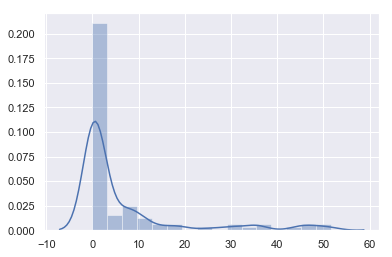

In [24]:
# Inspect prior distribution for reg_alpha
from hyperopt import pyll
reg_alpha_distr = hp.loguniform('n_estimators', -6, 4)
samples = [pyll.stochastic.sample(reg_alpha_distr) for i in range(100)]

# Plot
sns.distplot(pd.Series(samples))

# Descriptive statistics
pd.Series(samples).describe()

In [27]:
N_JOBS=1
MAX_EVALS = 40

# CSV file to track progress
progress_file_path = 'hp_progress/progress_xgb.csv'
with open(progress_file_path, 'w') as file:
    writer = csv.writer(file)
    # Write header to the file
    writer.writerow(['loss', 'params', 'n_trees'])

# Function to convert sampled parameters to integer or make positive, etc., 
# where necessary
def adjust_params_xgb(params):
    """ 
    Adjust parameters where hyperopt did not allow sampling from optimal 
    distribution.
    """

    # Convert sampled parameters to integer, where  applicable
    params['max_depth'] = round(params['max_depth'])
    
    # Make sure parameters are positive, where applicable
    if params['min_child_weight'] <= 0:
        params['min_child_weight'] = 1 # Set to default
    # Gamma will be negative half the time, so let's take absolute value
    params['gamma'] = np.abs(params['gamma'])

    # Set min or max thresholds for parameters, where applicable
    if params['max_depth'] <= 2:
        params['max_depth'] = 6 # Set to default
    if params['subsample'] < 0 or params['subsample'] > 1:
        params['subsample'] = 0.75
    if params['colsample_bytree'] < 0 or params['colsample_bytree'] > 1:
        params['colsample_bytree'] = 0.75
    
    # Return modified parameters
    return params


# Objective function to minimize
def objective(params, progress_file_path=progress_file_path,
              n_jobs=N_JOBS):
    """Objective function to minimize"""
    
    # Adjust parameters
    params = adjust_params_xgb(params)
    
    # Train model
    xgb_ = xgb.train(params, dtrain=data_xgb_train, 
                num_boost_round=1000,
                evals=[(data_xgb_test, "test")], # Remember to use a separate validation set later!!!
                early_stopping_rounds=50) 
    
    # Compute loss as the negative mean of the average precision scores
    # (since hyperopt can only minimize a function)
    loss = - xgb_.best_score
    
    # Save results to csv file
    with open(progress_file_path, 'a') as file:
        writer = csv.writer(file)
        writer.writerow([loss, params, xgb_.best_ntree_limit])

    # Return results
    return {'loss': loss, 'params': params, 'n_trees': xgb_.best_ntree_limit, 'status': STATUS_OK}


space = {
    # Parameters that we are going to tune (Note that these may be modified
    # in objective function to convert to integer or to set min or max.)
    'eta':.3,  # Start with a higher learning rate for speed
    'objective':'binary:logistic',
    'eval_metric':'map',
    'scale_pos_weight': 5,  # Balance classes
    'max_depth': hp.normal('max_depth', 6, 2),
    'min_child_weight': hp.normal('min_child_weight', 4, 2), 
    'gamma': hp.normal('gamma', 0, 0.2),  # We will take absolute value
    'subsample': hp.normal('subsample', 0.75, 0.2), 
    'colsample_bytree':  hp.normal('colsample_bytree', 0.75, 0.2),
    'reg_alpha': hp.loguniform('reg_alpha', -6, 4),
    'verbose_eval': False
}


# Minimize objective
best = fmin(objective, space, algo=tpe.suggest,
            max_evals=MAX_EVALS)

# Get the values of the optimal parameters
best_params = space_eval(space, best)

[08:20:08] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[0]	test-map:0.30357
Will train until test-map hasn't improved in 50 rounds.
[08:20:08] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[1]	test-map:0.345677
[08:20:08] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[2]	test-map:0.359257
[08:20:08] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[3]	test-map:0.360097
[08:20:08] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[4]	test-map:0.36592
[08:20:09] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: t

[08:20:10] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[47]	test-map:0.375185
[08:20:10] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[48]	test-map:0.37374
[08:20:10] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[49]	test-map:0.373232
[08:20:10] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[50]	test-map:0.374938
[08:20:10] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[51]	test-map:0.373472
[08:20:10] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned

[08:20:12] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[29]	test-map:0.368561
[08:20:12] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 0 pruned nodes, max_depth=5
[30]	test-map:0.369045
[08:20:12] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=5
[31]	test-map:0.370149
[08:20:12] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=5
[32]	test-map:0.369435
[08:20:12] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 0 pruned nodes, max_depth=5
[33]	test-map:0.369825
[08:20:12] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 prune

[17]	test-map:0.372234
[08:20:14] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=3
[18]	test-map:0.372116
[08:20:14] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[19]	test-map:0.372562
[08:20:14] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[20]	test-map:0.373
[08:20:14] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[21]	test-map:0.372815
[08:20:14] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[22]	test-map:0.371592
[08:20:14] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 

[08:20:16] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[65]	test-map:0.376241
[08:20:16] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[66]	test-map:0.376205
[08:20:16] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[67]	test-map:0.378194
[08:20:16] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[68]	test-map:0.378425
[08:20:16] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[69]	test-map:0.378083
[08:20:16] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned

[112]	test-map:0.375594
[08:20:17] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[113]	test-map:0.375231
[08:20:17] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[114]	test-map:0.37466
[08:20:17] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[115]	test-map:0.37472
[08:20:17] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[116]	test-map:0.374638
[08:20:17] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[117]	test-map:0.374544
[08:20:17] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots

[34]	test-map:0.362575
[08:20:19] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 2 pruned nodes, max_depth=6
[35]	test-map:0.362022
[08:20:19] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 110 extra nodes, 2 pruned nodes, max_depth=6
[36]	test-map:0.359504
[08:20:19] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 90 extra nodes, 2 pruned nodes, max_depth=6
[37]	test-map:0.358258
[08:20:19] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 82 extra nodes, 0 pruned nodes, max_depth=6
[38]	test-map:0.358152
[08:20:20] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 78 extra nodes, 0 pruned nodes, max_depth=6
[39]	test-map:0.358054
[08:20:20] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots,

[08:20:22] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 92 extra nodes, 0 pruned nodes, max_depth=9
[17]	test-map:0.363171
[08:20:22] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 80 extra nodes, 6 pruned nodes, max_depth=9
[18]	test-map:0.365203
[08:20:22] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 78 extra nodes, 2 pruned nodes, max_depth=9
[19]	test-map:0.365388
[08:20:22] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 78 extra nodes, 4 pruned nodes, max_depth=8
[20]	test-map:0.363053
[08:20:22] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 68 extra nodes, 0 pruned nodes, max_depth=6
[21]	test-map:0.36369
[08:20:22] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 76 extra nodes, 4 pruned

[0]	test-map:0.317443
Will train until test-map hasn't improved in 50 rounds.
[08:20:24] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 160 extra nodes, 0 pruned nodes, max_depth=7
[1]	test-map:0.323491
[08:20:24] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 188 extra nodes, 0 pruned nodes, max_depth=7
[2]	test-map:0.325427
[08:20:24] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 180 extra nodes, 0 pruned nodes, max_depth=7
[3]	test-map:0.331521
[08:20:24] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 140 extra nodes, 2 pruned nodes, max_depth=7
[4]	test-map:0.333689
[08:20:25] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 110 extra nodes, 0 pruned nodes, max_depth=7
[5]	test-map:0.337374
[08:20:25] C:\Users\Administrator\Desktop\xgboost\sr

[47]	test-map:0.321428
[08:20:27] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 156 extra nodes, 0 pruned nodes, max_depth=7
[48]	test-map:0.321787
[08:20:27] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 154 extra nodes, 0 pruned nodes, max_depth=7
[49]	test-map:0.318362
[08:20:27] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=7
[50]	test-map:0.31579
[08:20:27] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 86 extra nodes, 0 pruned nodes, max_depth=7
[51]	test-map:0.315503
[08:20:27] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 110 extra nodes, 2 pruned nodes, max_depth=7
[52]	test-map:0.316215
[08:20:28] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 root

[08:20:30] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 88 extra nodes, 4 pruned nodes, max_depth=6
[36]	test-map:0.34439
[08:20:30] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 84 extra nodes, 2 pruned nodes, max_depth=6
[37]	test-map:0.346386
[08:20:30] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 68 extra nodes, 0 pruned nodes, max_depth=6
[38]	test-map:0.342486
[08:20:30] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 82 extra nodes, 0 pruned nodes, max_depth=6
[39]	test-map:0.341647
[08:20:30] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 100 extra nodes, 2 pruned nodes, max_depth=6
[40]	test-map:0.340037
[08:20:30] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 98 extra nodes, 0 prune

[22]	test-map:0.355766
[08:20:32] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 68 extra nodes, 0 pruned nodes, max_depth=6
[23]	test-map:0.35607
[08:20:32] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 112 extra nodes, 0 pruned nodes, max_depth=6
[24]	test-map:0.353842
[08:20:32] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 82 extra nodes, 0 pruned nodes, max_depth=6
[25]	test-map:0.353009
[08:20:32] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 106 extra nodes, 0 pruned nodes, max_depth=6
[26]	test-map:0.35375
[08:20:32] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 84 extra nodes, 0 pruned nodes, max_depth=6
[27]	test-map:0.353941
[08:20:32] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 

[08:20:35] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 114 extra nodes, 0 pruned nodes, max_depth=6
[3]	test-map:0.353698
[08:20:35] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 112 extra nodes, 0 pruned nodes, max_depth=6
[4]	test-map:0.353152
[08:20:35] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 100 extra nodes, 0 pruned nodes, max_depth=6
[5]	test-map:0.350097
[08:20:35] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 88 extra nodes, 0 pruned nodes, max_depth=6
[6]	test-map:0.351416
[08:20:35] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 110 extra nodes, 0 pruned nodes, max_depth=6
[7]	test-map:0.349986
[08:20:35] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 72 extra nodes, 0 pruned

[50]	test-map:0.327981
[08:20:37] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 98 extra nodes, 0 pruned nodes, max_depth=6
[51]	test-map:0.327014
[08:20:37] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=6
[52]	test-map:0.325995
[08:20:38] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=6
[53]	test-map:0.326334
Stopping. Best iteration:
[3]	test-map:0.353698

[08:20:38] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 562 extra nodes, 4 pruned nodes, max_depth=9
[0]	test-map:0.285262
Will train until test-map hasn't improved in 50 rounds.
[08:20:38] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 436 extra nodes, 4 pruned nodes, max_depth=9
[1]	test-map:0.306742
[0

[43]	test-map:0.318174
[08:20:40] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 282 extra nodes, 8 pruned nodes, max_depth=9
[44]	test-map:0.316984
[08:20:40] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 348 extra nodes, 8 pruned nodes, max_depth=9
[45]	test-map:0.317913
[08:20:41] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 298 extra nodes, 8 pruned nodes, max_depth=9
[46]	test-map:0.318416
[08:20:41] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 366 extra nodes, 8 pruned nodes, max_depth=9
[47]	test-map:0.317539
[08:20:41] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 254 extra nodes, 8 pruned nodes, max_depth=9
[48]	test-map:0.317958
[08:20:41] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 ro

[08:20:43] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=5
[24]	test-map:0.362406
[08:20:43] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=5
[25]	test-map:0.360818
[08:20:43] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[26]	test-map:0.361734
[08:20:43] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=5
[27]	test-map:0.362056
[08:20:43] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 0 pruned nodes, max_depth=5
[28]	test-map:0.361449
[08:20:43] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 prune

[08:20:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 86 extra nodes, 2 pruned nodes, max_depth=7
[9]	test-map:0.342161
[08:20:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 110 extra nodes, 2 pruned nodes, max_depth=7
[10]	test-map:0.340401
[08:20:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 166 extra nodes, 0 pruned nodes, max_depth=7
[11]	test-map:0.338614
[08:20:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 156 extra nodes, 0 pruned nodes, max_depth=7
[12]	test-map:0.337707
[08:20:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 140 extra nodes, 2 pruned nodes, max_depth=7
[13]	test-map:0.33934
[08:20:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 134 extra nodes, 0 pr

[08:20:46] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 158 extra nodes, 0 pruned nodes, max_depth=7
[56]	test-map:0.319858
[08:20:46] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 148 extra nodes, 2 pruned nodes, max_depth=7
[57]	test-map:0.320322
[08:20:46] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 96 extra nodes, 2 pruned nodes, max_depth=7
[58]	test-map:0.319789
[08:20:46] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 146 extra nodes, 2 pruned nodes, max_depth=7
[59]	test-map:0.318723
Stopping. Best iteration:
[9]	test-map:0.342161

[08:20:47] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 656 extra nodes, 6 pruned nodes, max_depth=11
[0]	test-map:0.302237
Will train until test-map hasn't improved in 50 rounds.
[08:20:47] C:\Users\A

[08:20:50] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 308 extra nodes, 16 pruned nodes, max_depth=11
[42]	test-map:0.316356
[08:20:50] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 358 extra nodes, 20 pruned nodes, max_depth=11
[43]	test-map:0.317269
[08:20:50] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 362 extra nodes, 10 pruned nodes, max_depth=11
[44]	test-map:0.316403
[08:20:50] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 342 extra nodes, 8 pruned nodes, max_depth=11
[45]	test-map:0.317325
[08:20:50] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 372 extra nodes, 16 pruned nodes, max_depth=11
[46]	test-map:0.318971
[08:20:51] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 260 extra

[08:20:54] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 184 extra nodes, 28 pruned nodes, max_depth=11
[89]	test-map:0.318853
[08:20:54] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 266 extra nodes, 40 pruned nodes, max_depth=11
[90]	test-map:0.318385
[08:20:54] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 218 extra nodes, 20 pruned nodes, max_depth=11
[91]	test-map:0.319294
[08:20:54] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 222 extra nodes, 26 pruned nodes, max_depth=11
[92]	test-map:0.319527
[08:20:54] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 152 extra nodes, 12 pruned nodes, max_depth=11
[93]	test-map:0.319798
[08:20:54] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 138 extr

[08:20:57] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 140 extra nodes, 42 pruned nodes, max_depth=11
[136]	test-map:0.323704
[08:20:57] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 118 extra nodes, 42 pruned nodes, max_depth=11
[137]	test-map:0.32309
[08:20:58] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 108 extra nodes, 42 pruned nodes, max_depth=11
[138]	test-map:0.323821
[08:20:58] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 86 extra nodes, 30 pruned nodes, max_depth=11
[139]	test-map:0.323425
[08:20:58] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 118 extra nodes, 36 pruned nodes, max_depth=11
[140]	test-map:0.323397
[08:20:58] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 118 e

[08:21:01] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 100 extra nodes, 52 pruned nodes, max_depth=11
[183]	test-map:0.326872
[08:21:01] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 88 extra nodes, 62 pruned nodes, max_depth=11
[184]	test-map:0.326941
[08:21:01] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 64 extra nodes, 30 pruned nodes, max_depth=11
[185]	test-map:0.326716
[08:21:01] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 84 extra nodes, 42 pruned nodes, max_depth=11
[186]	test-map:0.326967
[08:21:01] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 82 extra nodes, 42 pruned nodes, max_depth=11
[187]	test-map:0.32665
[08:21:01] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 78 extra

[08:21:04] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 84 pruned nodes, max_depth=10
[230]	test-map:0.32847
[08:21:04] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 74 pruned nodes, max_depth=11
[231]	test-map:0.328446
[08:21:05] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 48 pruned nodes, max_depth=11
[232]	test-map:0.328698
[08:21:05] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 60 pruned nodes, max_depth=11
[233]	test-map:0.328524
[08:21:05] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 78 pruned nodes, max_depth=9
[234]	test-map:0.328427
[08:21:05] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 62 extra n

[08:21:08] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 70 pruned nodes, max_depth=10
[277]	test-map:0.329095
[08:21:08] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 84 pruned nodes, max_depth=7
[278]	test-map:0.328975
[08:21:08] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 80 pruned nodes, max_depth=11
[279]	test-map:0.328712
[08:21:08] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 64 pruned nodes, max_depth=10
[280]	test-map:0.328883
[08:21:08] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 64 pruned nodes, max_depth=9
[281]	test-map:0.328766
[08:21:08] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 38 extra n

[08:21:11] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 72 pruned nodes, max_depth=8
[324]	test-map:0.329976
[08:21:11] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 72 pruned nodes, max_depth=2
[325]	test-map:0.329988
[08:21:11] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 88 pruned nodes, max_depth=0
[326]	test-map:0.329988
[08:21:11] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 98 pruned nodes, max_depth=4
[327]	test-map:0.330154
[08:21:11] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 92 pruned nodes, max_depth=4
[328]	test-map:0.330304
[08:21:11] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 

Will train until test-map hasn't improved in 50 rounds.
[08:21:14] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 2 pruned nodes, max_depth=4
[1]	test-map:0.32875
[08:21:14] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[2]	test-map:0.336751
[08:21:14] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[3]	test-map:0.345481
[08:21:14] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 2 pruned nodes, max_depth=4
[4]	test-map:0.349756
[08:21:14] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[5]	test-map:0.355696
[08:21:14] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: 

[47]	test-map:0.364923
[08:21:16] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[48]	test-map:0.365237
[08:21:16] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[49]	test-map:0.366586
[08:21:16] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 2 pruned nodes, max_depth=4
[50]	test-map:0.367104
[08:21:16] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[51]	test-map:0.36764
[08:21:16] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 2 pruned nodes, max_depth=4
[52]	test-map:0.367657
[08:21:16] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 2

[08:21:17] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 2 pruned nodes, max_depth=4
[95]	test-map:0.360179
[08:21:17] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_depth=4
[96]	test-map:0.361329
[08:21:17] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[97]	test-map:0.360128
[08:21:17] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[98]	test-map:0.360123
[08:21:17] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[99]	test-map:0.359115
[08:21:17] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 2 prune

[08:21:19] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=4
[28]	test-map:0.371892
[08:21:19] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[29]	test-map:0.371552
[08:21:19] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[30]	test-map:0.372164
[08:21:19] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[31]	test-map:0.372207
[08:21:19] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[32]	test-map:0.371853
[08:21:19] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 prune

[0]	test-map:0.329243
Will train until test-map hasn't improved in 50 rounds.
[08:21:20] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[1]	test-map:0.352543
[08:21:20] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[2]	test-map:0.356792
[08:21:20] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[3]	test-map:0.367361
[08:21:20] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[4]	test-map:0.367926
[08:21:20] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[5]	test-map:0.371529
[08:21:20] C:\Users\Administrator\Desktop\xgboost\src\tre

[47]	test-map:0.372181
[08:21:22] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[48]	test-map:0.371982
[08:21:22] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[49]	test-map:0.371501
[08:21:22] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[50]	test-map:0.371419
[08:21:22] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[51]	test-map:0.370569
[08:21:22] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[52]	test-map:0.370595
[08:21:22] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 

[18]	test-map:0.371762
[08:21:24] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[19]	test-map:0.371226
[08:21:24] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=4
[20]	test-map:0.372886
[08:21:24] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[21]	test-map:0.373756
[08:21:24] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[22]	test-map:0.373685
[08:21:24] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[23]	test-map:0.373211
[08:21:24] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 

[08:21:25] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 184 extra nodes, 0 pruned nodes, max_depth=7
[3]	test-map:0.342025
[08:21:25] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 180 extra nodes, 0 pruned nodes, max_depth=7
[4]	test-map:0.346068
[08:21:25] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=7
[5]	test-map:0.346119
[08:21:26] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 136 extra nodes, 0 pruned nodes, max_depth=7
[6]	test-map:0.346659
[08:21:26] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nodes, 0 pruned nodes, max_depth=7
[7]	test-map:0.346062
[08:21:26] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 120 extra nodes, 0 prune

[08:21:28] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 182 extra nodes, 0 pruned nodes, max_depth=7
[50]	test-map:0.328948
[08:21:28] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 80 extra nodes, 0 pruned nodes, max_depth=7
[51]	test-map:0.329801
[08:21:28] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 134 extra nodes, 2 pruned nodes, max_depth=7
[52]	test-map:0.329151
[08:21:28] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 140 extra nodes, 2 pruned nodes, max_depth=7
[53]	test-map:0.329156
[08:21:29] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 86 extra nodes, 0 pruned nodes, max_depth=7
[54]	test-map:0.329529
[08:21:29] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 148 extra nodes, 0 p

[35]	test-map:0.357848
[08:21:31] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 146 extra nodes, 24 pruned nodes, max_depth=8
[36]	test-map:0.355673
[08:21:31] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 118 extra nodes, 12 pruned nodes, max_depth=8
[37]	test-map:0.353953
[08:21:31] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 156 extra nodes, 10 pruned nodes, max_depth=8
[38]	test-map:0.35347
[08:21:31] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 158 extra nodes, 14 pruned nodes, max_depth=8
[39]	test-map:0.352483
[08:21:31] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 136 extra nodes, 24 pruned nodes, max_depth=8
[40]	test-map:0.352643
[08:21:32] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 

[08:21:34] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 142 extra nodes, 0 pruned nodes, max_depth=8
[20]	test-map:0.33711
[08:21:34] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 68 extra nodes, 0 pruned nodes, max_depth=8
[21]	test-map:0.33562
[08:21:34] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 182 extra nodes, 2 pruned nodes, max_depth=8
[22]	test-map:0.33397
[08:21:34] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 176 extra nodes, 0 pruned nodes, max_depth=8
[23]	test-map:0.331991
[08:21:34] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 150 extra nodes, 0 pruned nodes, max_depth=8
[24]	test-map:0.330529
[08:21:34] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 178 extra nodes, 0 pru

[08:21:37] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 90 extra nodes, 0 pruned nodes, max_depth=6
[3]	test-map:0.35344
[08:21:37] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 110 extra nodes, 0 pruned nodes, max_depth=6
[4]	test-map:0.353352
[08:21:37] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 84 extra nodes, 0 pruned nodes, max_depth=6
[5]	test-map:0.357179
[08:21:37] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 78 extra nodes, 0 pruned nodes, max_depth=6
[6]	test-map:0.363903
[08:21:37] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 72 extra nodes, 0 pruned nodes, max_depth=6
[7]	test-map:0.36413
[08:21:37] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 96 extra nodes, 0 pruned node

[08:21:40] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 68 extra nodes, 2 pruned nodes, max_depth=6
[51]	test-map:0.349725
[08:21:40] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 78 extra nodes, 0 pruned nodes, max_depth=6
[52]	test-map:0.349194
[08:21:40] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 72 extra nodes, 0 pruned nodes, max_depth=6
[53]	test-map:0.348622
[08:21:40] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=6
[54]	test-map:0.34873
[08:21:40] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 92 extra nodes, 2 pruned nodes, max_depth=6
[55]	test-map:0.347366
[08:21:40] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned

[08:21:42] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[35]	test-map:0.381851
[08:21:42] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[36]	test-map:0.381725
[08:21:42] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[37]	test-map:0.381529
[08:21:42] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[38]	test-map:0.381579
[08:21:42] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[39]	test-map:0.380762
[08:21:42] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned

[82]	test-map:0.371752
[08:21:43] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[83]	test-map:0.372218
[08:21:43] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[84]	test-map:0.372496
[08:21:44] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[85]	test-map:0.373917
Stopping. Best iteration:
[35]	test-map:0.381851

[08:21:44] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[0]	test-map:0.316572
Will train until test-map hasn't improved in 50 rounds.
[08:21:44] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[1]	test-map:0.339405
[08

[08:21:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[44]	test-map:0.377716
[08:21:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[45]	test-map:0.378345
[08:21:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[46]	test-map:0.376961
[08:21:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[47]	test-map:0.377139
[08:21:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[48]	test-map:0.377166
[08:21:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned

[08:21:47] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[91]	test-map:0.370082
[08:21:47] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[92]	test-map:0.369884
[08:21:47] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[93]	test-map:0.370548
[08:21:47] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[94]	test-map:0.370683
[08:21:47] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[95]	test-map:0.370831
Stopping. Best iteration:
[45]	test-map:0.378345

[08:21:47] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: 

[08:21:48] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[42]	test-map:0.371031
[08:21:48] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[43]	test-map:0.370394
[08:21:48] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[44]	test-map:0.370474
[08:21:48] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[45]	test-map:0.370328
[08:21:48] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[46]	test-map:0.370489
[08:21:48] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 prune

[89]	test-map:0.362101
[08:21:50] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[90]	test-map:0.362382
[08:21:50] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[91]	test-map:0.362199
[08:21:50] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[92]	test-map:0.362389
Stopping. Best iteration:
[42]	test-map:0.371031

[08:21:50] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 118 extra nodes, 0 pruned nodes, max_depth=6
[0]	test-map:0.307072
Will train until test-map hasn't improved in 50 rounds.
[08:21:50] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 104 extra nodes, 0 pruned nodes, max_depth=6
[1]	test-map:0.333474
[

[08:21:52] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 94 extra nodes, 0 pruned nodes, max_depth=6
[44]	test-map:0.345494
[08:21:52] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 92 extra nodes, 0 pruned nodes, max_depth=6
[45]	test-map:0.345577
[08:21:52] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=6
[46]	test-map:0.346703
[08:21:52] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 94 extra nodes, 0 pruned nodes, max_depth=6
[47]	test-map:0.344935
[08:21:52] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 94 extra nodes, 0 pruned nodes, max_depth=6
[48]	test-map:0.343569
[08:21:52] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 76 extra nodes, 0 prune

[08:21:54] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[31]	test-map:0.374035
[08:21:54] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[32]	test-map:0.373098
[08:21:54] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[33]	test-map:0.372373
[08:21:54] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[34]	test-map:0.371834
[08:21:54] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[35]	test-map:0.372102
[08:21:54] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 prune

[13]	test-map:0.362597
[08:21:55] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 88 extra nodes, 0 pruned nodes, max_depth=6
[14]	test-map:0.363049
[08:21:55] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 110 extra nodes, 0 pruned nodes, max_depth=6
[15]	test-map:0.359835
[08:21:56] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 114 extra nodes, 0 pruned nodes, max_depth=6
[16]	test-map:0.358652
[08:21:56] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 104 extra nodes, 0 pruned nodes, max_depth=6
[17]	test-map:0.359307
[08:21:56] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 78 extra nodes, 0 pruned nodes, max_depth=6
[18]	test-map:0.358624
[08:21:56] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 root

Will train until test-map hasn't improved in 50 rounds.
[08:21:58] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[1]	test-map:0.33709
[08:21:58] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[2]	test-map:0.347913
[08:21:58] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[3]	test-map:0.353034
[08:21:58] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[4]	test-map:0.358193
[08:21:58] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[5]	test-map:0.360965
[08:21:58] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: 

[47]	test-map:0.374032
[08:21:59] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[48]	test-map:0.372892
[08:21:59] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[49]	test-map:0.373395
[08:21:59] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[50]	test-map:0.373022
[08:21:59] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[51]	test-map:0.373813
[08:21:59] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[52]	test-map:0.374343
[08:21:59] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 

[08:22:00] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16]	test-map:0.370706
[08:22:00] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17]	test-map:0.372074
[08:22:00] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[18]	test-map:0.372782
[08:22:00] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[19]	test-map:0.373381
[08:22:01] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[20]	test-map:0.37419
[08:22:01] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned

[63]	test-map:0.376923
[08:22:02] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[64]	test-map:0.376821
[08:22:02] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[65]	test-map:0.375793
[08:22:02] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[66]	test-map:0.37631
[08:22:02] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[67]	test-map:0.375841
[08:22:02] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[68]	test-map:0.375792
[08:22:02] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1

[23]	test-map:0.363115
[08:22:04] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 108 extra nodes, 0 pruned nodes, max_depth=6
[24]	test-map:0.361966
[08:22:04] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 80 extra nodes, 0 pruned nodes, max_depth=6
[25]	test-map:0.360804
[08:22:04] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 82 extra nodes, 0 pruned nodes, max_depth=6
[26]	test-map:0.359528
[08:22:04] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 64 extra nodes, 0 pruned nodes, max_depth=6
[27]	test-map:0.359175
[08:22:04] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 76 extra nodes, 2 pruned nodes, max_depth=6
[28]	test-map:0.356722
[08:22:04] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots,

[08:22:06] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=6
[5]	test-map:0.358776
[08:22:06] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 0 pruned nodes, max_depth=6
[6]	test-map:0.35656
[08:22:06] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 0 pruned nodes, max_depth=6
[7]	test-map:0.363567
[08:22:06] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 2 pruned nodes, max_depth=6
[8]	test-map:0.36946
[08:22:06] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=6
[9]	test-map:0.367489
[08:22:06] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes

[52]	test-map:0.378124
[08:22:08] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 0 pruned nodes, max_depth=6
[53]	test-map:0.378601
[08:22:08] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=6
[54]	test-map:0.37883
[08:22:08] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 2 pruned nodes, max_depth=5
[55]	test-map:0.378394
[08:22:08] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 0 pruned nodes, max_depth=6
[56]	test-map:0.37777
[08:22:08] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 0 pruned nodes, max_depth=6
[57]	test-map:0.377289
[08:22:08] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 38

[08:22:10] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=6
[100]	test-map:0.371732
[08:22:10] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 2 pruned nodes, max_depth=6
[101]	test-map:0.370756
[08:22:10] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 0 pruned nodes, max_depth=6
[102]	test-map:0.371104
[08:22:10] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=6
[103]	test-map:0.371099
[08:22:10] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 2 pruned nodes, max_depth=6
[104]	test-map:0.370594
Stopping. Best iteration:
[54]	test-map:0.37883

[08:22:10] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:

[41]	test-map:0.374102
[08:22:11] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[42]	test-map:0.373557
[08:22:11] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[43]	test-map:0.372216
[08:22:11] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[44]	test-map:0.371399
[08:22:11] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[45]	test-map:0.369507
[08:22:11] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[46]	test-map:0.370063
[08:22:11] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 

[13]	test-map:0.364466
[08:22:13] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=5
[14]	test-map:0.364862
[08:22:13] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=5
[15]	test-map:0.364582
[08:22:13] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=5
[16]	test-map:0.365743
[08:22:13] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 0 pruned nodes, max_depth=5
[17]	test-map:0.364181
[08:22:13] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=5
[18]	test-map:0.363971
[08:22:13] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 

[08:22:15] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=5
[61]	test-map:0.351274
[08:22:15] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=5
[62]	test-map:0.349993
[08:22:15] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[63]	test-map:0.350736
[08:22:15] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=5
[64]	test-map:0.350392
[08:22:15] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=5
[65]	test-map:0.350421
[08:22:15] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 prune

[08:22:17] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 102 extra nodes, 0 pruned nodes, max_depth=6
[41]	test-map:0.35776
[08:22:17] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=6
[42]	test-map:0.356884
[08:22:17] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 82 extra nodes, 0 pruned nodes, max_depth=6
[43]	test-map:0.356589
[08:22:17] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 96 extra nodes, 0 pruned nodes, max_depth=6
[44]	test-map:0.355655
[08:22:17] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 76 extra nodes, 0 pruned nodes, max_depth=6
[45]	test-map:0.356874
[08:22:17] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 86 extra nodes, 2 prune

[19]	test-map:0.370825
[08:22:19] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[20]	test-map:0.370955
[08:22:19] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[21]	test-map:0.370921
[08:22:19] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[22]	test-map:0.371763
[08:22:19] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[23]	test-map:0.371291
[08:22:19] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[24]	test-map:0.373365
[08:22:19] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 

[67]	test-map:0.376601
[08:22:20] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[68]	test-map:0.376041
[08:22:20] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[69]	test-map:0.375579
[08:22:20] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[70]	test-map:0.375705
[08:22:20] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[71]	test-map:0.3759
[08:22:20] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[72]	test-map:0.375876
[08:22:21] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14

[16]	test-map:0.371846
[08:22:22] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[17]	test-map:0.372375
[08:22:22] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[18]	test-map:0.371947
[08:22:22] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[19]	test-map:0.372914
[08:22:22] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[20]	test-map:0.374516
[08:22:22] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[21]	test-map:0.374679
[08:22:22] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 

[08:22:23] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[64]	test-map:0.374212
[08:22:23] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[65]	test-map:0.37435
[08:22:23] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[66]	test-map:0.374836
[08:22:23] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[67]	test-map:0.375311
[08:22:23] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[68]	test-map:0.374509
[08:22:23] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned

[30]	test-map:0.355389
[08:22:25] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 84 extra nodes, 0 pruned nodes, max_depth=6
[31]	test-map:0.353934
[08:22:25] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 80 extra nodes, 0 pruned nodes, max_depth=6
[32]	test-map:0.352678
[08:22:25] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 80 extra nodes, 0 pruned nodes, max_depth=6
[33]	test-map:0.35211
[08:22:25] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 92 extra nodes, 0 pruned nodes, max_depth=6
[34]	test-map:0.351434
[08:22:25] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 70 extra nodes, 0 pruned nodes, max_depth=6
[35]	test-map:0.351078
[08:22:25] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1

[18]	test-map:0.376603
[08:22:27] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[19]	test-map:0.376945
[08:22:27] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[20]	test-map:0.37813
[08:22:27] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 2 pruned nodes, max_depth=3
[21]	test-map:0.378383
[08:22:27] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[22]	test-map:0.379128
[08:22:27] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[23]	test-map:0.379376
[08:22:27] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12

[66]	test-map:0.386649
[08:22:29] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[67]	test-map:0.387111
[08:22:29] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[68]	test-map:0.386579
[08:22:29] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[69]	test-map:0.386833
[08:22:29] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[70]	test-map:0.387581
[08:22:29] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=3
[71]	test-map:0.387513
[08:22:29] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 

[08:22:30] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[114]	test-map:0.389037
[08:22:30] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[115]	test-map:0.388807
[08:22:30] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[116]	test-map:0.389147
[08:22:30] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[117]	test-map:0.389116
[08:22:30] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=3
[118]	test-map:0.388522
[08:22:30] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 

[160]	test-map:0.38503
[08:22:31] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=3
[161]	test-map:0.385168
Stopping. Best iteration:
[111]	test-map:0.389447

[08:22:31] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 70 extra nodes, 0 pruned nodes, max_depth=6
[0]	test-map:0.301572
Will train until test-map hasn't improved in 50 rounds.
[08:22:31] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 0 pruned nodes, max_depth=6
[1]	test-map:0.339442
[08:22:31] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 66 extra nodes, 0 pruned nodes, max_depth=6
[2]	test-map:0.340783
[08:22:31] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=6
[3]	test-map:0.35461
[08:

[45]	test-map:0.369994
[08:22:33] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=6
[46]	test-map:0.369095
[08:22:33] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=6
[47]	test-map:0.369906
[08:22:34] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 70 extra nodes, 0 pruned nodes, max_depth=6
[48]	test-map:0.36948
[08:22:34] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=6
[49]	test-map:0.369407
[08:22:34] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=6
[50]	test-map:0.369278
[08:22:34] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 4

[08:22:35] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[22]	test-map:0.376811
[08:22:35] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[23]	test-map:0.376973
[08:22:35] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[24]	test-map:0.377364
[08:22:35] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[25]	test-map:0.376798
[08:22:35] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[26]	test-map:0.377757
[08:22:35] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 prune

[08:22:37] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 2 pruned nodes, max_depth=4
[70]	test-map:0.376878
[08:22:37] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[71]	test-map:0.376738
[08:22:37] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[72]	test-map:0.376521
[08:22:37] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 2 pruned nodes, max_depth=4
[73]	test-map:0.376379
[08:22:37] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[74]	test-map:0.376452
[08:22:37] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 prune

Best average precision on validation set: 0.389447


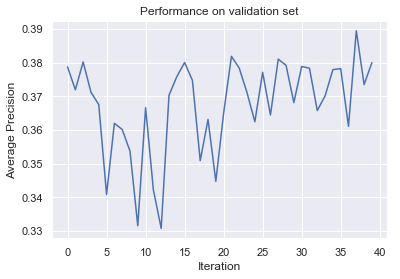

In [28]:
# Load full results from progress file
xgb_results = pd.read_csv('hp_progress/progress_xgb.csv')

# Get validation score
# Extract AP for each iteration
ap_xgb = - xgb_results.loss

print(f'Best average precision on validation set: {ap_xgb.max()}')

# Plot AP per iteration
ap_xgb.plot()
plt.title('Performance on validation set')
plt.ylabel('Average Precision')
plt.xlabel('Iteration');

Now that we have identified the best parameters, let's re-estimate the model with a lower learning rate to get another boost in accuracy.

In [29]:
# Decrease learning rate
best_params['eta'] = 0.005

# Adjust parameters (e.g., convert to integer)
best_params = adjust_params_xgb(best_params)

# Fit the model with the optimal hyperparamters and lower learning rate
xgb_best = xgb.train(best_params,
                    dtrain=data_xgb_train, 
                    num_boost_round=1000,
                    evals=[(data_xgb_test, "test")], # Remember to use a separate validation set later!!!
                    early_stopping_rounds=50) 
xgb_best.best_score    

[08:22:38] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[0]	test-map:0.273788
Will train until test-map hasn't improved in 50 rounds.
[08:22:38] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[1]	test-map:0.32096
[08:22:38] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[2]	test-map:0.325081
[08:22:38] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[3]	test-map:0.330452
[08:22:38] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[4]	test-map:0.331412
[08:22:38] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: 

[46]	test-map:0.34067
[08:22:39] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[47]	test-map:0.343281
[08:22:39] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[48]	test-map:0.339377
[08:22:39] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[49]	test-map:0.343056
[08:22:39] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[50]	test-map:0.343555
[08:22:39] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[51]	test-map:0.33946
[08:22:39] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14

[08:22:40] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=3
[94]	test-map:0.348346
[08:22:41] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[95]	test-map:0.348121
[08:22:41] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[96]	test-map:0.348766
[08:22:41] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[97]	test-map:0.351162
[08:22:41] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[98]	test-map:0.352142
[08:22:41] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 prune

[08:22:42] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=3
[141]	test-map:0.351974
[08:22:42] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[142]	test-map:0.351647
[08:22:42] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=3
[143]	test-map:0.352525
[08:22:42] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[144]	test-map:0.353614
[08:22:42] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[145]	test-map:0.353741
[08:22:42] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 

[187]	test-map:0.3598
[08:22:43] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[188]	test-map:0.359487
[08:22:43] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[189]	test-map:0.360389
[08:22:43] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=3
[190]	test-map:0.359456
[08:22:43] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[191]	test-map:0.359441
[08:22:43] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[192]	test-map:0.360899
[08:22:43] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roo

[234]	test-map:0.363065
[08:22:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[235]	test-map:0.362853
[08:22:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=3
[236]	test-map:0.36353
[08:22:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[237]	test-map:0.363402
[08:22:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[238]	test-map:0.363446
[08:22:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[239]	test-map:0.364164
[08:22:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 ro

[08:22:46] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[281]	test-map:0.36613
[08:22:46] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[282]	test-map:0.365735
[08:22:46] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[283]	test-map:0.365326
[08:22:46] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[284]	test-map:0.366004
[08:22:46] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[285]	test-map:0.365427
[08:22:46] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 p

[08:22:47] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[328]	test-map:0.368107
[08:22:47] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[329]	test-map:0.367398
[08:22:47] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[330]	test-map:0.368028
[08:22:47] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=3
[331]	test-map:0.367614
[08:22:47] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[332]	test-map:0.368159
[08:22:47] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 

[374]	test-map:0.369557
[08:22:49] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[375]	test-map:0.369583
[08:22:49] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[376]	test-map:0.369664
[08:22:49] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[377]	test-map:0.369735
[08:22:49] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[378]	test-map:0.369819
[08:22:49] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[379]	test-map:0.369817
[08:22:49] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 r

[421]	test-map:0.371075
[08:22:50] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[422]	test-map:0.371054
[08:22:50] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 2 pruned nodes, max_depth=3
[423]	test-map:0.371027
[08:22:50] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[424]	test-map:0.371099
[08:22:50] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[425]	test-map:0.371128
[08:22:50] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[426]	test-map:0.371089
[08:22:50] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 r

[08:22:51] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[468]	test-map:0.372392
[08:22:51] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=3
[469]	test-map:0.372399
[08:22:51] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[470]	test-map:0.372413
[08:22:51] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[471]	test-map:0.372428
[08:22:51] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[472]	test-map:0.37245
[08:22:51] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 p

[514]	test-map:0.373356
[08:22:53] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[515]	test-map:0.373361
[08:22:53] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[516]	test-map:0.373431
[08:22:53] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[517]	test-map:0.373432
[08:22:53] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[518]	test-map:0.373428
[08:22:53] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[519]	test-map:0.37344
[08:22:53] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 ro

[08:22:54] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[562]	test-map:0.37433
[08:22:54] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[563]	test-map:0.374276
[08:22:54] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[564]	test-map:0.374299
[08:22:54] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=3
[565]	test-map:0.374321
[08:22:54] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[566]	test-map:0.374343
[08:22:54] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 p

[608]	test-map:0.375282
[08:22:55] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 2 pruned nodes, max_depth=3
[609]	test-map:0.375342
[08:22:55] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 2 pruned nodes, max_depth=3
[610]	test-map:0.375349
[08:22:55] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[611]	test-map:0.375331
[08:22:55] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[612]	test-map:0.375372
[08:22:55] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 2 pruned nodes, max_depth=3
[613]	test-map:0.375369
[08:22:55] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 r

[655]	test-map:0.375556
[08:22:57] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[656]	test-map:0.375568
[08:22:57] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[657]	test-map:0.375603
[08:22:57] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[658]	test-map:0.375594
[08:22:57] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=3
[659]	test-map:0.375617
[08:22:57] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[660]	test-map:0.37561
[08:22:57] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 ro

[702]	test-map:0.376047
[08:22:58] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[703]	test-map:0.376068
[08:22:58] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[704]	test-map:0.3761
[08:22:58] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[705]	test-map:0.376126
[08:22:58] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[706]	test-map:0.376135
[08:22:58] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[707]	test-map:0.376145
[08:22:58] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roo

[08:22:59] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[750]	test-map:0.376673
[08:22:59] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[751]	test-map:0.37673
[08:22:59] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[752]	test-map:0.376745
[08:22:59] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[753]	test-map:0.376728
[08:22:59] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[754]	test-map:0.376728
[08:22:59] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 p

[08:23:01] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=3
[797]	test-map:0.377251
[08:23:01] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[798]	test-map:0.377281
[08:23:01] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[799]	test-map:0.377273
[08:23:01] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[800]	test-map:0.377316
[08:23:01] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[801]	test-map:0.377339
[08:23:01] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 

[08:23:02] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 2 pruned nodes, max_depth=3
[844]	test-map:0.377876
[08:23:02] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[845]	test-map:0.377885
[08:23:02] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=3
[846]	test-map:0.377909
[08:23:02] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 4 pruned nodes, max_depth=3
[847]	test-map:0.377906
[08:23:02] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[848]	test-map:0.377905
[08:23:02] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 

[08:23:03] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[891]	test-map:0.378522
[08:23:03] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=3
[892]	test-map:0.378525
[08:23:03] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[893]	test-map:0.378524
[08:23:03] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[894]	test-map:0.378534
[08:23:03] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[895]	test-map:0.378525
[08:23:04] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 p

[08:23:05] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[938]	test-map:0.379013
[08:23:05] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[939]	test-map:0.379006
[08:23:05] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[940]	test-map:0.379003
[08:23:05] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[941]	test-map:0.379017
[08:23:05] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[942]	test-map:0.379038
[08:23:05] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 p

[08:23:06] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[985]	test-map:0.379288
[08:23:06] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[986]	test-map:0.37928
[08:23:06] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[987]	test-map:0.379336
[08:23:06] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=3
[988]	test-map:0.379321
[08:23:06] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[989]	test-map:0.37931
[08:23:06] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pr

0.379365

In [16]:
# Add optimum number of trees to best parameters
best_params['num_boost_round'] = xgb_best.best_ntree_limit
# Remove early stopping, because now we don't need it anymore
best_params['early_stopping_rounds'] = None

In [36]:
# Save feature importances
fi_xgb = pd.Series(xgb_best.get_fscore()) \
            .sort_values(ascending=False)
feature_importances = {}
feature_importances['xgb'] = fi_xgb
fi_xgb

fico_range_low                                      554
dti                                                 540
acc_open_past_24mths                                453
log_yearly_installment_to_inc                       410
term_5y                                             362
log1p_avg_cur_bal                                   236
lti                                                 225
log1p_bc_open_to_buy                                224
log1p_mths_since_recent_bc                          223
log1p_total_bc_limit                                212
x2_MORTGAGE                                         188
log1p_mort_acc                                      186
percent_bc_gt_75                                    150
log1p_tot_hi_cred_lim                               147
log_mo_sin_old_rev_tl_op                            145
fico_range_high                                     139
log1p_inq_last_6mths                                133
log1p_mths_since_recent_inq                     

In [35]:
feature_importances

NameError: name 'feature_importances' is not defined

###  old


Since we have a lot of parameters to tune, we need a smart way of searching over the different parameters that avoids the combinatorial explosion that would result from a simultaneous grid search over all parameters.  In the following, I will follow the suggestions from https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/ and https://blog.cambridgespark.com/hyperparameter-tuning-in-xgboost-4ff9100a3b2f.

We will start with a high learning rate to speed up computation, and then determine the ideal number of estimators for this learning rate.  Later, we will tune tree-specific parameters.

In [ ]:
data_xgb_train = xgb.DMatrix(data=X_train_small, label=y_train_small)
data_xgb_test = xgb.DMatrix(data=X_test_small, label=y_test_small)

In [ ]:
    # params = {'objective':'binary:logistic', 'eval_metric':'map',
#          'scale_pos_weight':5,  # Balance class weight
#          'seed':0, 'learning_rate':0.1, 'n_estimators':1000,
#          'max_depth':5, 'min_child_weight':1, 'gamma':0,
#          'subsample':0.8, 'colsample_bytree':0.8,
#          'nthread':4}
params = {
    # Parameters that we are going to tune.
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    # Other parameters
    'objective':'binary:logistic',
    'eval_metric':'map'
}

N_JOBS = 3
space = {
    'objective':'binary:logistic', 
    'eval_metric':'map',
    'scale_pos_weight':5,  # Balance class weight
    'seed':0, 
    'n_estimators': hp.quniform('n_estimators', 100, 1000, 1),
    'eta': hp.quniform('eta', 0.025, 0.5, 0.025),
    # A problem with max_depth casted to float instead of int with
    # the hp.quniform method.
    'max_depth':  hp.choice('max_depth', np.arange(1, 14, dtype=int)),
    'min_child_weight': hp.quniform('min_child_weight', 1, 6, 1),
    'subsample': hp.quniform('subsample', 0.5, 1, 0.05),
    'gamma': hp.quniform('gamma', 0.5, 1, 0.05),
    'colsample_bytree': hp.quniform('colsample_bytree', 0.5, 1, 0.05),
    'eval_metric': 'auc',
    'objective': 'binary:logistic',
    'nthread': N_JOBS,
    'booster': 'gbtree',
    'tree_method': 'exact',
    'silent': 1,
    'seed': random_state
    }
xgb_cv = xgb.train(params=params, dtrain=data_xgb_train, 
                num_boost_round=1000,
                evals=[(data_xgb_test, "test")],
                early_stopping_rounds=50) 
#                 stratified=True, num_boost_round=1000, 
#                 early_stopping_rounds=50, verbose_eval=False,
#                 as_pandas=True, seed=0)

In [ ]:
# Parameters to search over
param_grid = {'max_depth'= [3, 5, 7, 10],  # Control complexity
              'min_child_weight'= , # The higher, the more regularization
              'gamma'= 0, # Higher value leads to fewer splits for a given node (i.e. more regularization) if
              'subsample'= [0.5, 0.75, 1],  # Fraction of observations per tree 
              'colsample_bytree': [0.5, 0.75, 1]} # Fraction of features per tree
# Grid search
xgb_gs_1 = GridSearchCV(xgb_1, param_grid=param_grid, 
                        num_boo
                        scoring='average_precision',
                        return_train_score=True,
                        n_jobs=N_JOBS, cv=3, verbose=5)
xgb_gs_1.fit(X_train_small, y_train_small) 

# Save model
joblib.dump(xgb_gs_1, 'saved_models/xgb_gs_1.joblib')

# Predictions
y_proba_xgb = xgb_.predict_proba(X_test_small)[:, 1]
average_precision_score(y_test_small, y_proba_xgb)

In [ ]:
xgb_1 = XGBClassifier(objective='binary:logistic', learning_rate=0.1,
               n_estimators=1000,
               max_depth=5,min_child_weight=1, gamma=0,
               subsample=0.8, colsample_bytree=0.8,
               seed=0, nthread=N_JOBS)
xgb_1.fit(X_train_small, y_train_small,
          early_stopping_rounds=50,
          eval_set=[(X_test_small, y_test_small)],
          eval_metric='map'
         )

In [ ]:
# Save model
# joblib.dump(xgb_gs_1, 'saved_models/xgb_gs_1.joblib')

# Predictions
y_proba_xgb = xgb_1.predict_proba(X_test_small)[:, 1]
average_precision_score(y_test_small, y_proba_xgb)

In [ ]:
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb1, train, predictors)

In [ ]:
params = {'objective':'binary:logistic', 'eval_metric':'map',
         'scale_pos_weight':5,  # Balance class weight
         'seed':0}
xgb_cv = xgb.cv(dtrain=data_xgb_train, params=params, nfold=3,
                num_boost_round=50, as_pandas=True)

In [ ]:
y_xgb_cv = xgb_cv.predict(X_test_small)
average_precision_score(y_test_small, y_xgb_cv)

### Logistic regression
#### With smaller subset of data

#####  Grid search

In [ ]:
lr_1 = SGDClassifier(loss='log', penalty='elasticnet', 
                      class_weight='balanced', 
                      max_iter=1000, tol=1E-3, # those are defaults for sklearn 0.21+
                      random_state=1, n_jobs=N_JOBS) 

# Parameters to search over
param_grid = {'l1_ratio': np.linspace(0, 1, 11),
              'alpha': np.logspace(-6, 1, 8)}
# Grid search
lr_gs_1 = GridSearchCV(lr_1, param_grid=param_grid, 
                       scoring='average_precision',
                       return_train_score=True,
                       n_jobs=N_JOBS, cv=3)
lr_gs_1.fit(X_train_small, y_train_small) 

# Save model
joblib.dump(lr_gs_1, 'saved_models/lr_gs_1.joblib')

In [ ]:
# Load model
lr_gs_1 = joblib.load('saved_models/lr_gs_1.joblib')

In [ ]:
def gs_best_result(gridsearchcv, decimals=3):
    """Returns details for best results from grid search."""

    # Get mean validation scores
    scores = pd.DataFrame(gridsearchcv.cv_results_) \
                .drop('params', axis='columns')
    
    # Get values for hyperparameters 
    params = pd.DataFrame(
        gridsearchcv.cv_results_['params'])
    
    # Concatenate validation scores and hyperparameters 
    scores_w_params = pd.concat([params, scores], axis=1)
    # Set hyperparameters as index
    scores_w_params = scores_w_params \
                        .set_index(params.columns.tolist())
    
    # Get tuple with best hyperparameters values, making sure it 
    # has the same order as the multi-index.
    best_param_tuple = (
        gridsearchcv.best_params_[scores_w_params.index.names[0]],
        gridsearchcv.best_params_[scores_w_params.index.names[1]])
    
    # Filter results for best hyperparameters 
    best_result = pd.to_numeric(
                    scores_w_params.loc[best_param_tuple, :])
    
    # Return rounded result (convert to dataframe for pretty  printing)
    return(pd.DataFrame(best_result) \
               .round(decimals))

gs_best_result(lr_gs_1)

In [ ]:
# Predictions
y_pred_lr_1= lr_gs_1.predict(X_test_small)    
y_pred_proba_lr_1= lr_gs_1.predict_proba(X_test_small)[:, 1]

# Save results
average_precision_1['logistic regression'] = \
    average_precision_score(y_test_small, y_pred_proba_lr_1)
classification_reports_1['logistic regression'] = \
    classification_report(y_test_small, y_pred_lr_1)

# Compute feature importance and sort
most_important_features_1['logistic regression'] = \
    pd.Series(lr_gs_1.best_estimator_.coef_[0], 
          index=feature_names_small) \
    .sort_values(ascending=False) \
    .iloc[: 10] 

In [ ]:
# Visualize grid search results
def gs_heatmap(gridsearchcv, x_digits=0, y_digits=0,
               x_scientific_notation=True, y_scientific_notation=True):
    """Visualizes validation accuracy from grid search over two hyperparameters."""
    
    # Print test score and  hyperparameters
    print('Best score: {:.3f}, best hyperparameters: '
                .format(gridsearchcv.best_score_), 
          gridsearchcv.best_params_)
      
    # Get mean validation scores
    scores = pd.DataFrame(
        gridsearchcv.cv_results_['mean_test_score'])
    # Get values for hyperparameters
    params = pd.DataFrame(
        gridsearchcv.cv_results_['params'])
    # Concatenate validation scores and hyperparameters 
    scores_w_params = pd.concat([params, scores], 
                                  axis=1)
    # Set first two columns, which correspond to parameters, as index.
    # Then unstack.
    index_cols = list(scores_w_params.columns)[:2]
    scores_2d = scores_w_params.set_index(index_cols) \
                    .squeeze() \
                    .unstack()
    
    # Create desired formatting string for axes (scientific notation and digits)
    if x_scientific_notation == True:
        x_notation = 'E' 
    else: 
        x_notation = 'F'
    x_formatting = '{:.' + str(x_digits) + x_notation + '}'

    if y_scientific_notation == True:
        y_notation = 'E' 
    else: 
        y_notation = 'F'
    y_formatting = '{:.' + str(y_digits) + y_notation + '}'

    # Plot
    fig, ax = plt.subplots()
    sns.heatmap(scores_2d, ax=ax,
                xticklabels=[x_formatting.format(x) for  x in scores_2d.columns],
                yticklabels=[y_formatting.format(y) for y in scores_2d.index])
    ax.set_title('Validation accuracy')
    

In [ ]:
gs_heatmap(lr_gs_1, x_digits=1, x_scientific_notation=False)

In [ ]:
average_precision_1

##### Hyperopt

In [10]:
space = {
    'loss': 'log',
    'penalty': 'elasticnet',
    'class_weight': 'balanced',
    'max_iter': 1000,
    'tol':1E-3,
    'random_state': 1,
    'alpha': hp.loguniform('alpha', -6, 1),
    'l1_ratio': hp.uniform('l1_ratio', 0, 1)
}

# Find best hyperparameters
find_best_hp(SGDClassifier, space, model_name='lr_hp_1',
              X_train=X_train_small, y_train=y_train_small,
              max_evals=8*11, n_jobs=3, n_folds=3,)

{'alpha': 0.01142672556599434, 'class_weight': 'balanced', 'l1_ratio': 0.18346993227117658, 'loss': 'log', 'max_iter': 1000, 'penalty': 'elasticnet', 'random_state': 1, 'tol': 0.001}


Performance: 0.37503654872776293

In [12]:
# Load model
lr_hp_1 = joblib.load('saved_models/lr_hp_1.joblib')

In [13]:
progress_lr = pd.read_csv('hp_progress/progress_lr.csv')

In [14]:
# Best average precision score on validation set
-progress_lr.loss.min()

0.3839230812564754

We see that the best performance on the test set, 0.378, is slightly higher than what we found with a grid search, .375. Though this difference is only small, but note that this was achieved with the same number of iterations. Thus, let's take a look at how the performance changed with the number of iterations, to see if we already reached a plateau earlier.

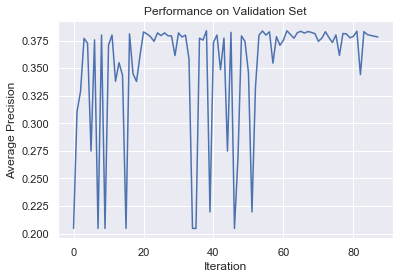

In [15]:
ap = - progress_lr.loss
ap.plot()
plt.title('Performance on Validation Set')
plt.ylabel('Average Precision')
plt.xlabel('Iteration');

This plot shows nicely how the Bayesian search algorithm has an intelligent approach towards the exploration-exploitation dilemma: For the first 20 or so iterations, it focuses on *exploration*: It searches the hyperparameter space seemingly randomly, resulting in both very high and very low performance. Later, it shifts to *exploitation*: Having identified values for the hyperparameters that work well, it shifts to predominantly searching around these values, resulting in more consistent high performance.  Nevertheless, it occasionally shifts back to exploring values further away, in order to avoid getting stuck in a local maximum.

We also see that there does not seem to be much payoff from further optimization once reasonably good values have been found: The best values found during the first 10 iterations are not far off from the overall maximum. Thus, when we ran the hyperparameters optimization on the full data set, we will only let the algorithm run for 40 iteration, since the performance reaches a plateau starting at around 20 iterations.

#### With all data

##### Grid search

Let's now estimate the model on all data. Based on the results from the smaller data set, we will adjust the parameter grade for alpha, the constant that multiplies the regularization term: We will drop all values for alpha greater than 0.1, since these did not give us good performance. 

Because we are now using more data, the optimal regularization term will be even smaller; thus, we leave the minimum value for alpha to search over constant, even though it did not give us great performance either on the smaller data. 

In [21]:
# Logistic regression (Elastic Net) 
# ---------------------------------
n_jobs=2
lr_2 = SGDClassifier(loss='log', penalty='elasticnet', 
                      class_weight='balanced', 
                      max_iter=1000, tol=1E-3, # those are defaults for sklearn 0.21+
                      random_state=1, n_jobs=N_JOBS) 

# Parameters to search over
param_grid = {'l1_ratio': np.linspace(0, 1, 11),
              'alpha': np.logspace(-6, 0, 13)}

# Grid search
lr_gs_2 = GridSearchCV(lr_2, param_grid=param_grid, 
                       scoring='average_precision',
                       return_train_score=True,
                       n_jobs=N_JOBS, cv=5)
lr_gs_2.fit(X_train, y_train) 

# Save model

joblib.dump(lr_gs_2, 'saved_models/lr_gs_2.joblib')

NameError: name 'N_JOBS' is not defined

In [ ]:
# Load model
lr_gs_2 = joblib.load('saved_models/lr_gs_2.joblib')

In [ ]:
print_save_ap(lr_gs_2, 'lr_gs_2', X_test, y_test)

In [ ]:
# # Predictions
# y_pred_lr_2 = lr_gs_2.predict(X_test)
# y_pred_proba_lr_2 = lr_gs_2.predict_proba(X_test)[:, 1]

# # Save results
# average_precision_2['logistic regression'] = \
#     average_precision_score(y_test, y_pred_proba_lr_2)
# classification_reports_2['logistic regression'] = \
#     classification_report(y_test, y_pred_lr_2)

In [ ]:
print_save_ap(lr_gs_2, 'lr_gs_2', X_test_small, y_test_small)

In [ ]:
# Compute feature importance and sort
most_important_features_2['logistic regression'] = \
    pd.Series(lr_gs_2.best_estimator_.coef_[0], 
          index=feature_names) \
    .sort_values(ascending=False) \
    .iloc[: 10] 

In [ ]:
# Visualize grid search results    
gs_heatmap(lr_gs_2, x_digits=1, x_scientific_notation=False)

In [ ]:
print(classification_reports_2['logistic regression'])

##### Hyperopt

In [16]:
# Search space
space = {
    'loss': 'log',
    'penalty': 'elasticnet',
    'class_weight': 'balanced',
    'max_iter': 1000,
    'tol':1E-3,
    'random_state': 1,
    'alpha': hp.loguniform('alpha', -6, 0),
    'l1_ratio': hp.uniform('l1_ratio', 0, 1)
}

# Find best hyperparameters
find_best_hp(SGDClassifier, space, model_name='lr_hp_2',
              X_train=X_train, y_train=y_train,
              max_evals=40, n_jobs=3, n_folds=5)

{'alpha': 0.0025979423415591948, 'class_weight': 'balanced', 'l1_ratio': 0.00036068987232787484, 'loss': 'log', 'max_iter': 1000, 'penalty': 'elasticnet', 'random_state': 1, 'tol': 0.001}


In [31]:
# Load model
lr_hp_2 = joblib.load('saved_models/lr_hp_2.joblib')

Best average precision score on *test* set: 0.3903933446456078


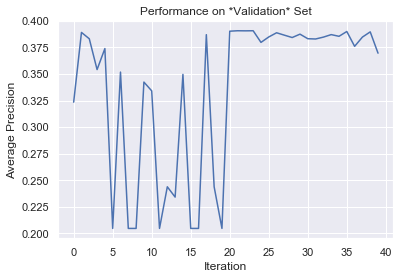

In [32]:
print_save_ap(lr_hp_2, 'lr_hp_2', X_test, y_test, validation_plot=True)

### Support Vector Machine
#### Linear SVM

##### With smaller subset of data

##### Grid search

In [ ]:
# Linear SVM
# ----------
# Elastic net, logistic regression (Loss='hinge')
svm_lin_1 = SGDClassifier(loss='hinge', penalty='elasticnet', random_state=1,
                          max_iter=1000, tol=1E-3,
                          class_weight='balanced', n_jobs=N_JOBS) 

# Parameters to search over
param_grid = {'l1_ratio': np.linspace(0, 1, 3),
              'alpha': np.logspace(-5, 1, 7)}
svm_lin_gs_1 = GridSearchCV(svm_lin_1, param_grid=param_grid,
                          scoring='average_precision',
                          return_train_score=True,       
                          n_jobs=N_JOBS, cv=5)
svm_lin_gs_1.fit(X_train_small, y_train_small)

# Save model
joblib.dump(svm_lin_gs_1, 'saved_models/svm_lin_gs_1.joblib')

In [ ]:
### Load model
svm_lin_gs_1 = joblib.load('saved_models/svm_lin_gs_1.joblib')

In [ ]:
# Prediction of class
y_pred_svm_lin_1 = svm_lin_gs_1.predict(X_test_small)
# Distance from separating hyperplane
y_pred_distance_svm_lin_1 = svm_lin_gs_1.decision_function(X_test_small)

# Save results
average_precision_1['SVM (Linear Kernel)'] = \
    average_precision_score(y_test_small, y_pred_distance_svm_lin_1)
classification_reports_1['SVM (Linear Kernel)'] = \
    classification_report(y_test_small, y_pred_svm_lin_1)

# Visualize grid search results
gs_heatmap(svm_lin_gs_1, x_digits=1, x_scientific_notation=False)

In [ ]:
average_precision_1

##### Hyperopt

In [19]:
# Search space
space = {
    'loss': 'hinge',
    'penalty': 'elasticnet',
    'class_weight': 'balanced',
    'max_iter': 1000,
    'tol':1E-3,
    'random_state': 1,
    'alpha': hp.loguniform('alpha', -6, 1),
    'l1_ratio': hp.uniform('l1_ratio', 0, 1)
}

# Find best hyperparameters
find_best_hp(
      SGDClassifier, space, model_name='svm_lin_hp_1',
      X_train=X_train_small, y_train=y_train_small,
      max_evals=8*11, n_jobs=3, n_folds=3)

{'alpha': 0.05655377675108154, 'class_weight': 'balanced', 'l1_ratio': 0.03089677998736734, 'loss': 'hinge', 'max_iter': 1000, 'penalty': 'elasticnet', 'random_state': 1, 'tol': 0.001}


In [ ]:
progress_lr = pd.read_csv('progress_lr.csv')

In [ ]:
# Best average precision score on validation set
-progress_lr.loss.min()

In [ ]:
ap = - progress_lr.loss
ap.plot()
plt.title('Performance on Validation Set')
plt.ylabel('Average Precision')
plt.xlabel('Iteration');

  ##### With whole data set

We will now repeat this analysis on the whole data set. Again, since more data will require less regularization, we will look at lower our maximum value for alpha to 0.1

In [ ]:
# Linear SVM
# ----------
# Elastic net, logistic regression (Loss='hinge')
svm_lin_2 = SGDClassifier(loss='hinge', penalty='elasticnet', random_state=1,
                          max_iter=1000, tol=1E-3,
                          class_weight='balanced', n_jobs=N_JOBS) 

# Parameters to search over
param_grid = {'l1_ratio': np.linspace(0, 1, 11),
              'alpha': np.logspace(-5, -1, 9)}
svm_lin_gs_2 = GridSearchCV(svm_lin_2, param_grid=param_grid,
                          scoring='average_precision',
                          return_train_score=True,       
                          n_jobs=N_JOBS, cv=5)
svm_lin_gs_2.fit(X_train, y_train)

# Save model
joblib.dump(svm_lin_gs_2, 'saved_models/svm_lin_gs_2.joblib')

In [ ]:
# Load model
svm_lin_gs_2 = joblib.load('saved_models/svm_lin_gs_2.joblib')

In [ ]:
# Prediction of class
y_pred_svm_2 = svm_lin_gs_2.predict(X_test)
# Distance from separating hyperplane
y_pred_distance_svm_2 = svm_lin_gs_2.decision_function(X_test)

# Save results
average_precision_2['SVM (Linear Kernel)'] = \
    average_precision_score(y_test, y_pred_distance_svm_2)
classification_reports_2['SVM (Linear Kernel)'] = \
    classification_report(y_test, y_pred_svm_2)

# Visualize grid search results
gs_heatmap(svm_lin_gs_2, x_digits=1, x_scientific_notation=False)

In [ ]:
# Get AP score
print_save_ap(svm_lin_gs_2, 'svm_lin_gs_2', X_test, y_test)

###### Hyperopt

In [20]:
# Search space
space = {
    'loss': 'hinge',
    'penalty': 'elasticnet',
    'class_weight': 'balanced',
    'max_iter': 1000,
    'tol':1E-3,
    'random_state': 1,
    'alpha': hp.loguniform('alpha', -5, -1),
    'l1_ratio': hp.uniform('l1_ratio', 0, 1)
}

# Find best hyperparameters
find_best_hp(
      SGDClassifier, space, model_name='svm_lin_hp_2',
      X_train=X_train, y_train=y_train,
      max_evals=40, n_jobs=3, n_folds=5)

{'alpha': 0.013578038470492092, 'class_weight': 'balanced', 'l1_ratio': 0.005502704985240636, 'loss': 'hinge', 'max_iter': 1000, 'penalty': 'elasticnet', 'random_state': 1, 'tol': 0.001}


In [33]:
# Load model
svm_lin_hp_2 = joblib.load('saved_models/svm_lin_hp_2.joblib')

Best average precision score on *test* set: 0.38832990404733325


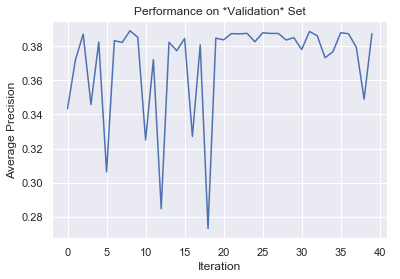

In [34]:
print_save_ap(svm_lin_hp_2, 'svm_lin_hp_2', X_test, y_test, validation_plot=True)

#### SVM with RBF-Kernel

##### With smaller subset of data

In [ ]:
svm_rbf_1 = SVC(kernel='rbf', probability=False, 
              cache_size=5000, class_weight='balanced')
# Parameters to search over
param_grid = {'C': np.logspace(-3, 3, 8),
              'gamma': np.logspace(-5, 1, 8)}
# Define indices for validation split (instead of proper cross-validation)
split_indices = ShuffleSplit(n_splits=1, test_size=.2, random_state=1)

svm_rbf_gs_1 = GridSearchCV(svm_rbf_1, param_grid=param_grid,
                          return_train_score=True,
                          scoring='average_precision', cv=split_indices)
svm_rbf_gs_1.fit(X_train_small, y_train_small)

# Save model
joblib.dump(svm_rbf_gs_1, 'saved_models/svm_rbf_gs_1.joblib')

In [ ]:
# Load model
svm_rbf_gs_1 = joblib.load('saved_models/svm_rbf_gs_1.joblib')

In [ ]:
# Prediction of class
y_pred_svm_rbf_1 = svm_rbf_gs_1.predict(X_test_small)

# Distance from separating hyperplane
y_pred_distance_svm_rbf_1 = svm_rbf_gs_1.decision_function(X_test_small)

# Save results
average_precision_1['SVM (RBF Kernel)'] = \
    average_precision_score(y_test_small, y_pred_distance_svm_rbf_1)

classification_reports_1['SVM (RBF Kernel)'] = \
    classification_report(y_test_small, y_pred_svm_rbf_1)

In [ ]:
gs_best_result(svm_rbf_gs_1)

In [ ]:
gs_heatmap(svm_rbf_gs_1) #, x_digits=1, x_scientific_notation=False)

In [ ]:
pd.DataFrame(svm_rbf_gs_1.cv_results_)

In [ ]:
average_precision_1

##### With more data

In [ ]:
svm_rbf_2 = SVC(kernel='rbf', probability=False, 
              cache_size=10000, class_weight='balanced')
# Parameters to search over
param_grid = {'C': np.logspace(-2, 3, 6),
              'gamma': np.logspace(-5, -1, 4)}
# Define indices for validation split (instead of proper cross-validation)
split_indices = ShuffleSplit(n_splits=1, random_state=1,
                             train_size=50000, test_size=1000)

svm_rbf_gs_2 = GridSearchCV(svm_rbf_2, param_grid=param_grid,
                          return_train_score=True, n_jobs=3,
                          scoring='average_precision', cv=split_indices)
svm_rbf_gs_2.fit(X_train, y_train)

# Save model
joblib.dump(svm_rbf_gs_2, 'saved_models/svm_rbf_gs_2.joblib')

In [ ]:
# Load model
svm_rbf_gs_2 = joblib.load('saved_model/svm_rbf_gs_2.joblib')

In [ ]:
# Prediction of class
y_pred_svm_rbf_2 = svm_rbf_gs_2.predict(X_test)

# Distance from separating hyperplane
y_pred_distance_svm_rbf_2 = svm_rbf_gs_2.decision_function(X_test)

# Save results
average_precision_2['SVM (RBF Kernel)'] = \
    average_precision_score(y_test, y_pred_distance_svm_rbf_2)

classification_reports_2['SVM (RBF Kernel)'] = \
    classification_report(y_test, y_pred_svm_rbf_2)

In [ ]:
gs_best_result(svm_rbf_gs_2)

In [ ]:
gs_heatmap(svm_rbf_gs_2, x_digits=1, x_scientific_notation=False)

In [ ]:
pd.DataFrame(svm_rbf_gs_2.cv_results_)

#### SVM with polynomial kernel 

##### With smaller subset of data

In [ ]:
svm_poly = SVC(kernel='poly', probability=False, gamma='auto',
              cache_size=5000, class_weight='balanced')
# Parameters to search over
param_grid = {'C': np.logspace(-3, 3, 8),
              'degree': [2,3,4]}
# Define indices for validation split (instead of proper cross-validation)
split_indices = ShuffleSplit(n_splits=1, test_size=.2, random_state=1)

svm_poly_gs = GridSearchCV(svm_poly, param_grid=param_grid,
                          return_train_score=True,
                          scoring='average_precision', cv=split_indices)
svm_poly_gs.fit(X_train_p, y_train)

In [ ]:
# Prediction of class
y_pred_svm_poly = svm_poly_gs.predict(X_test_p)

# Distance from separating hyperplane
y_pred_distance_svm_poly = svm_poly_gs.decision_function(X_test_p)

# Save results
average_precision['SVM (Polynomial Kernel)'] = \
    average_precision_score(y_test, y_pred_distance_svm_poly)

classification_reports['SVM (Polynomial Kernel)'] = \
    classification_report(y_test, y_pred_svm_poly)

In [ ]:
gs_heatmap(svm_poly_gs, x_scientific_notation=False)

In [ ]:
# Save model
joblib.dump(svm_poly_gs, 'svm_poly_gs.joblib')

## Performance comparison

In [ ]:
average_precision

In [ ]:
average_precision = 
plt.title('Impact of Dropping Columns on Classifier Performance')
plt.ylabel('Average Precision');